In [81]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import sklearn
import matplotlib
import torch

check current versions of libraries 

In [84]:
#print(torch.__version__)
#print(pd.__version__)
#print(np.__version__)
#print(sklearn.__version__)
#print(matplotlib.__version__)
#!python -V

Python 3.8.5


In [ ]:
load the data 

In [29]:
math = pd.read_csv('math.csv')

In [30]:
math = math.drop(columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'])
#print(math)
#math = math.drop(columns=['activities', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])

In [ ]:
#port = pd.read_csv('por.csv')
#port = port.drop(columns=['school', 'Mjob', 'Fjob', 'reason', 'guardian'])
#port = port.drop(columns=['activities', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'])

check the dimension of input data for future configuration of the network

In [31]:
inputDim = len(math.columns) - 1
print(inputDim)

27


In [32]:
noRows = math.shape[0]
print(noRows)

395


split the variables

In [33]:
X = np.array([i[:inputDim] for i in math.values.tolist()])
#print(X)
y = np.array([i[-1] for i in math.values.tolist()])
#print(y)

create a SVR model with different parameters

In [65]:
#svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)})

svr = SVR(kernel='rbf'', gamma=0.01, C=100, epsilon=0.1)
#svr = SVR(kernel='poly', degree=4, gamma=0.1, C=1, epsilon=0.1)
#svr = SVR(kernel='linear',  gamma=0.1, C=1, epsilon=0.1)


implement a KFold Cross Validation for better results

In [66]:
kf = KFold(n_splits=10)
print(kf.get_n_splits(X))
print(kf)

10
KFold(n_splits=10, random_state=None, shuffle=False)


calculate the avg R-squared value 

In [67]:
sum = 0

In [68]:

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = torch.tensor(X[train_index]).float(), torch.tensor(X[test_index]).float()
    y_train, y_test = torch.tensor(y[train_index]).float(), torch.tensor(y[test_index]).float()
    
    svr.fit(X_train, y_train)
    print(svr.score(X_test, y_test))
    sum = sum + float(svr.score(X_test, y_test))


0.35613614354439405
-60.566925928263586
0.18680152667707584
0.4021250614599591
-3.0887340988250642
-1.0326935447130992
-376.8205990002032
-1.1156964540505538
0.33816394072101674
0.22870188681070747


In [69]:
avg = (sum/10)
print(avg)

-44.111272046684235


plot learning curve, scalability and performance

In [26]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None,cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5) ):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

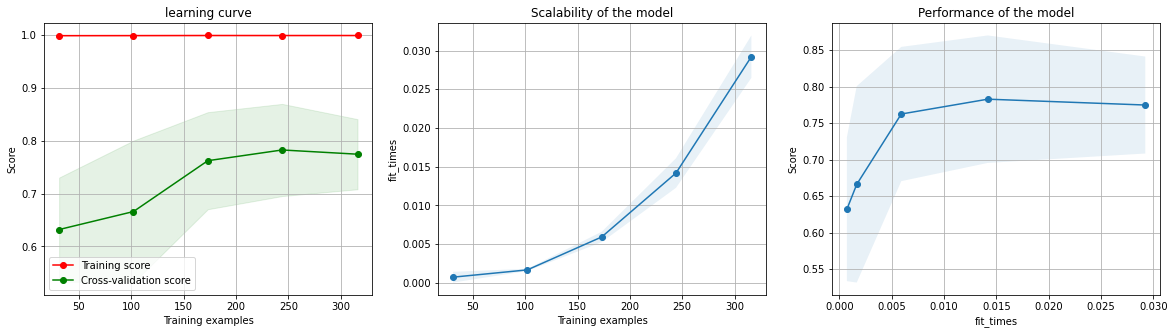

In [27]:
plot_learning_curve(svr, "learning curve", X, y)
plt.show()